# Exploratory Analysis

In [2]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get the data

In [3]:
from olist.data import Olist
data = Olist().get_data()

Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- to a `seller_id`...
- and leaves a `review_id`...
- all this belonging to an `order_id`

## Investigate the cardinalities of your various DataFrames

❓ **How many unique `orders`, `reviews`, `sellers`, `products` and `customers` are there ?**

In [10]:
print("Unique orders:", data['orders']['order_id'].nunique())
print("Unique reviews:", data['order_reviews']['review_id'].nunique())
print("Unique sellers:", data['sellers']['seller_id'].nunique())
print("Unique products:", data['products']['product_id'].nunique())
print("Unique customers:", data['customers']['customer_id'].nunique())


Unique orders: 99441
Unique reviews: 98410
Unique sellers: 3095
Unique products: 32951
Unique customers: 99441


In [13]:
data['order_reviews'].info

<bound method DataFrame.info of                               review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \

In [15]:
data['order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


❓ **How many reviews are there per order? Do we have reviews for all orders ?**
<details>
    <summary markdown='span'>Hints</summary>

This info is not directly accessible in your individual csv. You'll need to merge tables to find out. Think about which kind of merge you need.

Not sure which tables you need? Go back to your ERD to find out.

To find out the number of reviews: count the number of reviews per `order_id`, and plot a histogram. You can use `.hist()` on a Pandas series.
</details>

In [29]:
#nb reviews / order
reviews_per_order = data['order_reviews'].groupby('order_id')["review_id"].count()
reviews_per_order


order_id
00010242fe8c5a6d1ba2dd792cb16214    1
00018f77f2f0320c557190d7a144bdd3    1
000229ec398224ef6ca0657da4fc703e    1
00024acbcdf0a6daa1e931b038114c75    1
00042b26cf59d7ce69dfabb4e55b4fd9    1
                                   ..
fffc94f6ce00a00581880bf54a75a037    1
fffcd46ef2263f404302a634eb57f7eb    1
fffce4705a9662cd70adb13d4a31832d    1
fffe18544ffabc95dfada21779c9644f    1
fffe41c64501cc87c801fd61db3f6244    1
Name: review_id, Length: 98673, dtype: int64

<Axes: >

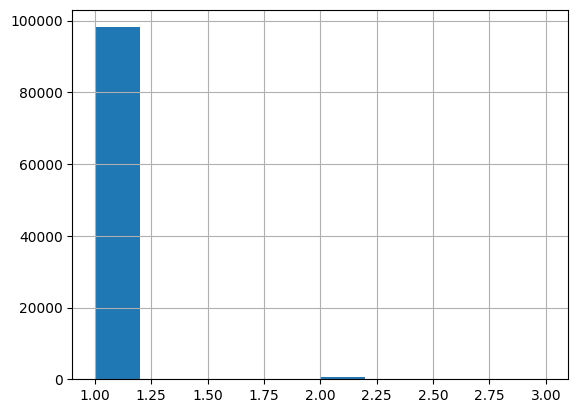

In [26]:
reviews_per_order.hist()

In [52]:
test=pd.merge(data['orders'],data['order_reviews'],on="order_id",how="left")

test2 = test.groupby("order_id")['review_id'].count()
print(test2)

order_id
00010242fe8c5a6d1ba2dd792cb16214    1
00018f77f2f0320c557190d7a144bdd3    1
000229ec398224ef6ca0657da4fc703e    1
00024acbcdf0a6daa1e931b038114c75    1
00042b26cf59d7ce69dfabb4e55b4fd9    1
                                   ..
fffc94f6ce00a00581880bf54a75a037    1
fffcd46ef2263f404302a634eb57f7eb    1
fffce4705a9662cd70adb13d4a31832d    1
fffe18544ffabc95dfada21779c9644f    1
fffe41c64501cc87c801fd61db3f6244    1
Name: review_id, Length: 99441, dtype: int64


🧪 **Test your code below**

Store the number of orders with missing reviews as `int` in a variable named `n_missing_reviews`

In [53]:
n_missing_reviews = (test2 == 0).sum()

In [ ]:
# YOUR CODE HERE

In [54]:
from nbresult import ChallengeResult

result = ChallengeResult('exploratory',
    n=n_missing_reviews
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/03-Decision-Science/01-Statistical-Inference/data-exploratory-analysis/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_exploratory.py::TestExploratory::test_n_missing_reviews PASSED      [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/exploratory.pickle

git commit -m 'Completed exploratory step'

git push origin master

